In [1]:
library(readr)
library(dplyr)
library(tidyr)
library(stats)
library(dplyr)
library(knitr)
library(stringr) # For string operations
# For Tukey's HSD test
library(multcomp)
library(ggplot2)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Loading required package: mvtnorm

Loading required package: survival



Loading required package: TH.data

Loading required package: MASS


Attaching package: 'MASS'


The following object is masked from 'package:dplyr':

    select



Attaching package: 'TH.data'


The following object is masked from 'package:MASS':

    geyser




In [2]:
# Load the CSV file
survey_data <- read.csv("../data/raw/2023-03-27_PSYC-421_Single_Use_Cup_text.csv", stringsAsFactors = FALSE)

# View the first few rows of the data frame
# head(survey_data)

In [3]:
# Get the columns in the survey
column_names <- names(survey_data)
# column_names


In [4]:
filter_df <- dplyr::select(survey_data, 
  `Duration..in.seconds.`, `Finished`, `ResponseId`, 
  `Q2`, `Q3`, `Q4`, 
  `Q2.1`, `Q3.1`, `Q4.1`, 
  `Q2.2`, `Q3.2`, `Q4.2`, 
  `Q5`, `Q5_5_TEXT`, `Q6`, `Q6_5_TEXT`, `Q7`, `Q8`, `Q8_4_TEXT`, 
  `ConditionAssigned`
)


In [5]:
# Remove the second row as this additional data is not needed
df_cleaned <- filter_df[-2, ]
# View the first few rows to confirm removal
# head(df_cleaned)

In [6]:
# Specify the path and filename and add to processed data
output_path <- "../data/processed/df_cleaned_text.csv"

# Write the dataframe to a CSV file
write.csv(df_cleaned, output_path, row.names = FALSE)


### Demographic

In [7]:
q5_counts <- df_cleaned %>%
  filter(Q5 != "", Q5 != "What is your status at UBC? - Selected Choice") %>%
  count(Q5, name = "Count") %>%
  arrange(desc(Count))
q5_counts

Q5,Count
<chr>,<int>
Students,179
Not Affiliated,50
Other (please specify),10
Staff,3
Faculty Member,1


What is your status at UBC?

|Status                 | Count|
|:----------------------|-----:|
|Students               |   179|
|Not Affiliated         |    50|
|Other (please specify) |    10|
|Staff                  |     3|
|Faculty Member         |     1|

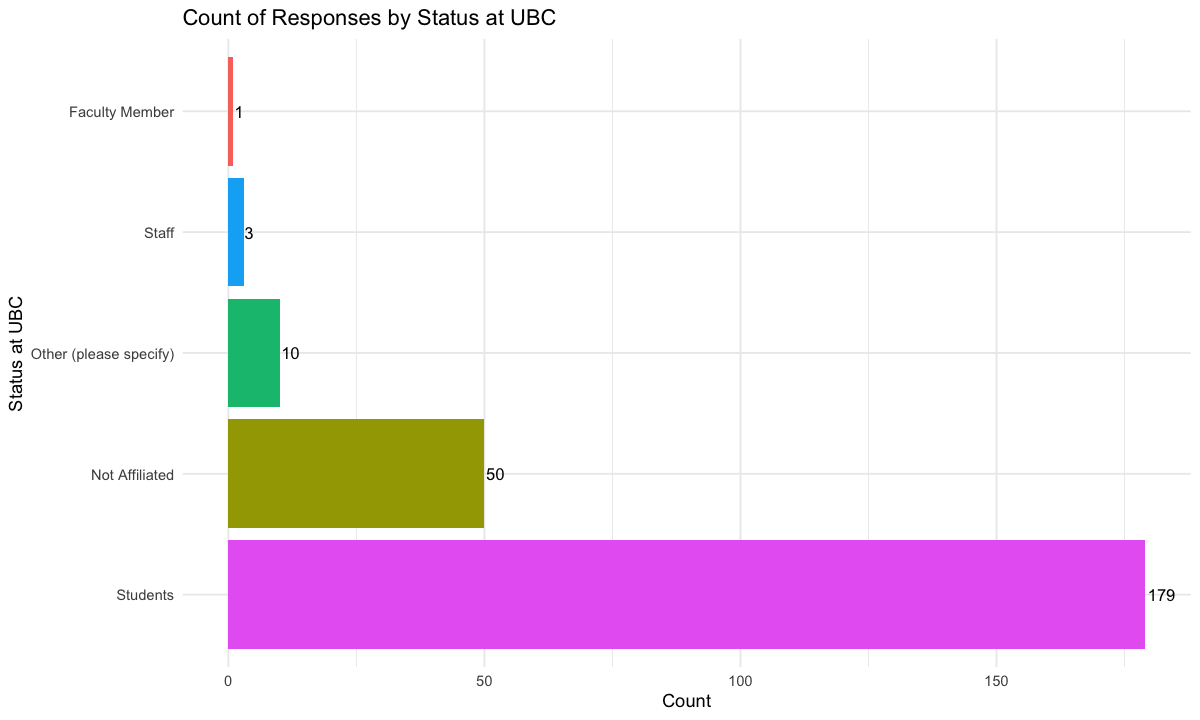

In [8]:
options(repr.plot.width=10, repr.plot.height=6)
plot = ggplot(q5_counts, aes(x = reorder(Q5, -Count), y = Count, fill = Q5)) +
    geom_col() +
    coord_flip() + # Flip coordinates for horizontal bars
    labs(title = "Count of Responses by Status at UBC",
        x = "Status at UBC",
        y = "Count") +
    theme_minimal() +
    theme(legend.title = element_blank(), # Remove legend title
        legend.position = "none") # Remove legend if not needed
plot + geom_text(aes(label = Count), position = position_dodge(width = 0.9), hjust = -0.1, size = 3.5)

In [9]:
q6_counts <- df_cleaned %>%
  filter(Q6 != "", Q6 != "What is your gender identity? - Selected Choice") %>%
  count(Q6, name = "Count") %>%
  arrange(desc(Count))
q6_counts

Q6,Count
<chr>,<int>
Woman,128
Man,107
Non-binary,5
Prefer not to say,3


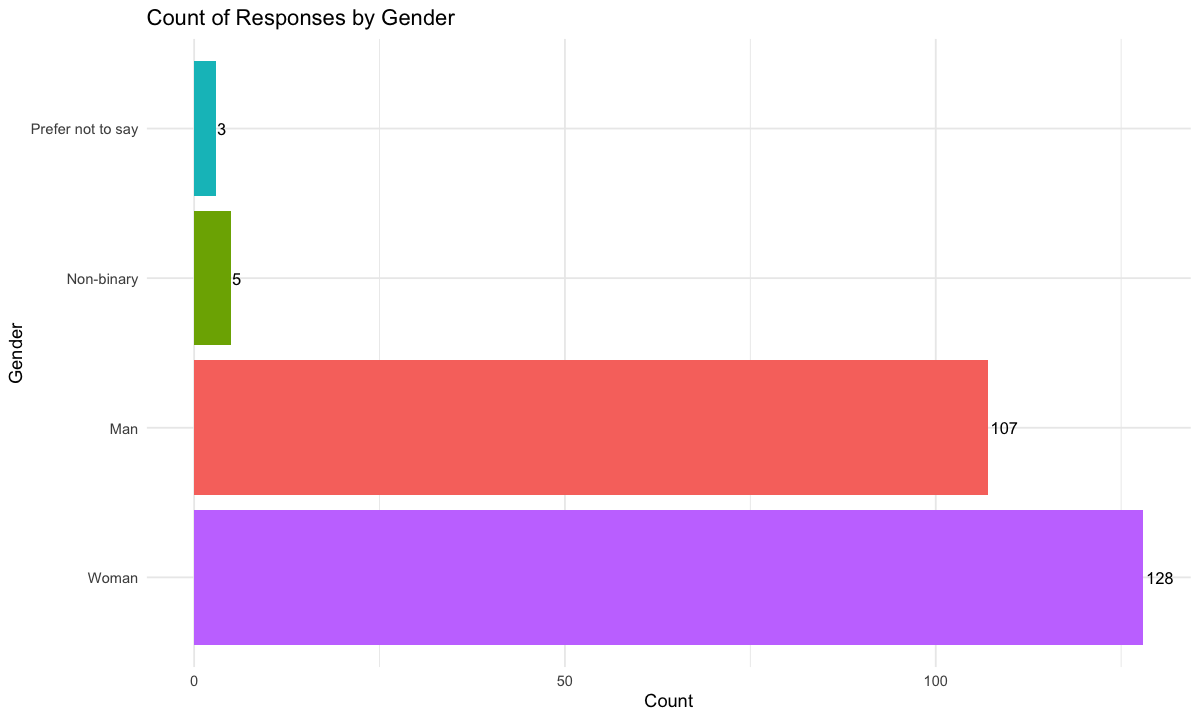

In [10]:
options(repr.plot.width=10, repr.plot.height=6)
plot = ggplot(q6_counts, aes(x = reorder(Q6, -Count), y = Count, fill = Q6)) +
    geom_col() +
    coord_flip() + # Flip coordinates for horizontal bars
    labs(title = "Count of Responses by Gender",
        x = "Gender",
        y = "Count") +
    theme_minimal() +
    theme(legend.title = element_blank(), # Remove legend title
        legend.position = "none") # Remove legend if not needed
plot + geom_text(aes(label = Count), position = position_dodge(width = 0.9), hjust = -0.1, size = 3.5)

In [11]:
q7_counts <- df_cleaned %>%
  filter(Q7 != "", Q7 != "What is your age? (in number of years)") %>%
  count(Q7, name = "Count") %>%
  arrange(desc(Count))

### Average age 22

In [12]:
# Convert Q7 to numeric, coercing errors to NA (which removes non-numeric entries like "I9")
df_cleaned$Q7_numeric <- as.numeric(as.character(df_cleaned$Q7))

# Calculate the mean, excluding NA values
average_age <- mean(df_cleaned$Q7_numeric, na.rm = TRUE)

# Print the average age
average_age

Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"


[1] 22.22176

### What factors would most likely reduce consumption of single-use cups

In [13]:
q8_counts_ordered <- df_cleaned %>%
  count(Q8, name = "Count") %>%
  arrange(desc(Count)) # Use arrange(Count) for ascending order

In [14]:
# What factor(s) would most likely reduce your consumption of single-use cups? (Choose all applicable answers)
q8_counts_ordered <- df_cleaned %>%
  # Remove rows where Q8 is empty or has a placeholder text
  filter(Q8 != "", Q8 != "What factor(s) would most likely reduce your consumption of single-use cups? (Choose all applicable answers) - Selected Choice") %>%
  count(Q8, name = "Count") %>%
  arrange(desc(Count)) # Use arrange(Count) for ascending order
q8_counts_ordered

Q8,Count
<chr>,<int>
"Learning about the environmental consequences associated with single-use cups (i.e,. pollution, cups used per day),Learning about the financial implications of using single-use cups (i.e., cost per cup)",47
"Learning about the environmental consequences associated with single-use cups (i.e,. pollution, cups used per day)",41
"Learning about the environmental consequences associated with single-use cups (i.e,. pollution, cups used per day),Learning about the financial implications of using single-use cups (i.e., cost per cup),Preferences for alternatives of single-use cup (i.e., I prefer to use my own mug)",37
"Learning about the financial implications of using single-use cups (i.e., cost per cup)",35
"Preferences for alternatives of single-use cup (i.e., I prefer to use my own mug)",32
"Learning about the environmental consequences associated with single-use cups (i.e,. pollution, cups used per day),Preferences for alternatives of single-use cup (i.e., I prefer to use my own mug)",15
Other (Specify),15
"Learning about the financial implications of using single-use cups (i.e., cost per cup),Preferences for alternatives of single-use cup (i.e., I prefer to use my own mug)",13
"Learning about the environmental consequences associated with single-use cups (i.e,. pollution, cups used per day),Learning about the financial implications of using single-use cups (i.e., cost per cup),Preferences for alternatives of single-use cup (i.e., I prefer to use my own mug),Other (Specify)",2


In [15]:
individual_responses <- df_cleaned %>%
  # Separate multiple responses into individual rows
  separate_rows(Q8, sep = ",") %>%
  # Trim whitespace to ensure accurate matching
  mutate(Q8 = trimws(Q8))

# Create a new column to categorize responses based on keywords
categorized_responses <- individual_responses %>%
  mutate(Category = case_when(
    str_detect(Q8, "environmental consequences") ~ "Environmental Consequences",
    str_detect(Q8, "financial implications") ~ "Financial Implications",
    str_detect(Q8, "Preferences for alternatives") ~ "Preferences for Alternatives",
    str_detect(Q8, "Other") ~ "Other (Specify)",
    TRUE ~ "Other"
  )) %>%
  count(Category, name = "Count") %>%
  filter(Category != "Other") %>%
  arrange(desc(Count))

# To view the categorized and counted responses
categorized_responses

Category,Count
<chr>,<int>
Environmental Consequences,144
Financial Implications,136
Preferences for Alternatives,101
Other (Specify),23


In [16]:
filtered_responses <- categorized_responses %>%
  filter(Category != "Other (Specify)")

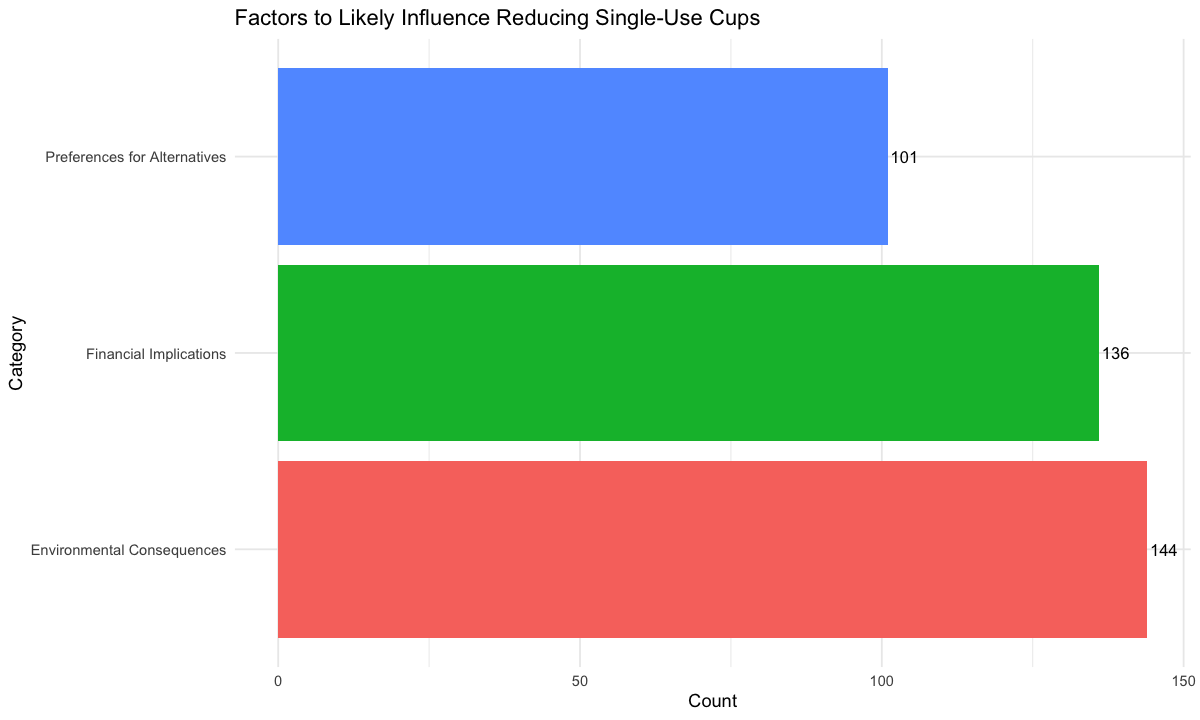

In [17]:
options(repr.plot.width=10, repr.plot.height=6)
plot = ggplot(filtered_responses, aes(x = reorder(Category, -Count), y = Count, fill = Category)) +
    geom_col() +
    coord_flip() + # Flip coordinates for horizontal bars
    labs(title = "Factors to Likely Influence Reducing Single-Use Cups",
        x = "Category",
        y = "Count") +
    theme_minimal() +
    theme(legend.title = element_blank(), # Remove legend title
        legend.position = "none") # Remove legend if not needed
plot + geom_text(aes(label = Count), position = position_dodge(width = 0.9), hjust = -0.1, size = 3.5)

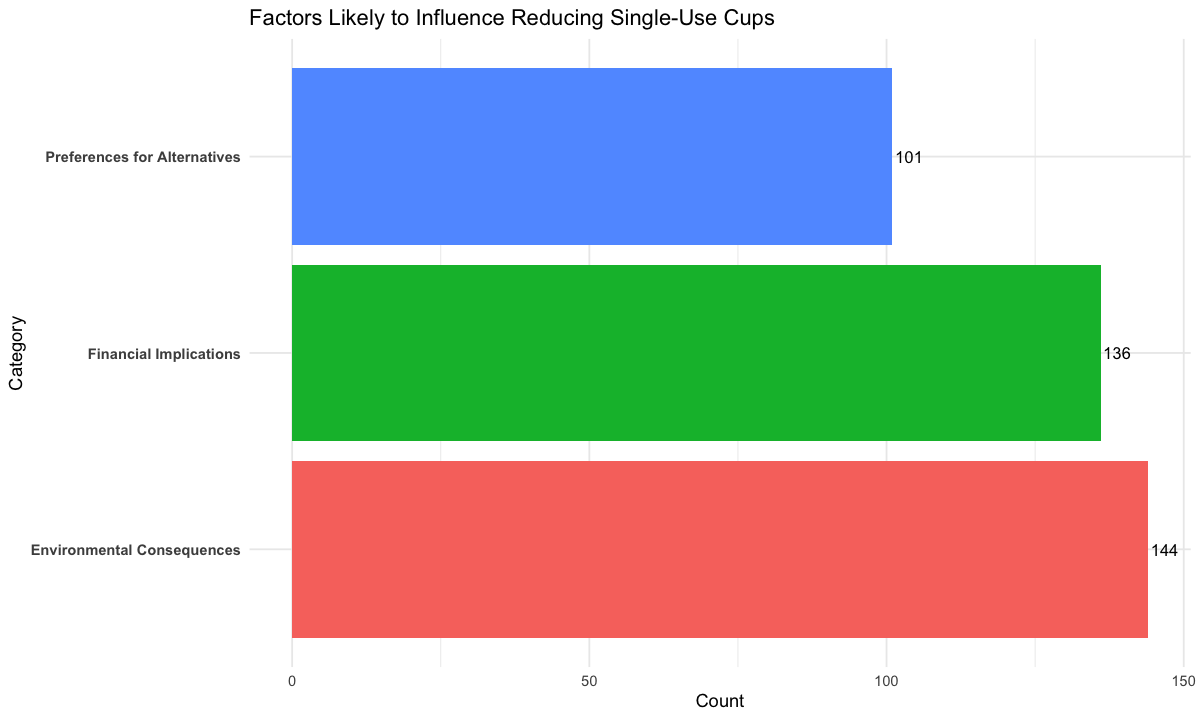

In [18]:
options(repr.plot.width=10, repr.plot.height=6)
plot = ggplot(filtered_responses, aes(x = reorder(Category, -Count), y = Count, fill = Category)) +
  geom_col() +
  coord_flip() + # Flip coordinates for horizontal bars
  labs(title = "Factors Likely to Influence Reducing Single-Use Cups",
       x = "Category",
       y = "Count") +
  theme_minimal() +
  theme(legend.title = element_blank(), # Remove legend title
        legend.position = "none", # Remove legend if not needed
        axis.text.y = element_text(face = "bold")) + # Make y-axis text bold
  geom_text(aes(label = Count), position = position_dodge(width = 0.9), hjust = -0.1, size = 3.5)

print(plot)


In [19]:
# Load the CSV file
survey_data_numeric <- read.csv("../data/raw/2023-03-27_PSYC-421_Single_Use_Cup_numerical.csv", stringsAsFactors = FALSE)

# View the first few rows of the data frame
# head(survey_data_numeric)

In [20]:
# keep only selected columns for analysis

filter_df_numerical <- dplyr::select(survey_data_numeric, 
  `Duration..in.seconds.`, `Finished`, `ResponseId`, 
  `Q2`, `Q3`, `Q4`, 
  `Q2.1`, `Q3.1`, `Q4.1`, 
  `Q2.2`, `Q3.2`, `Q4.2`, 
  `Q5`, `Q5_5_TEXT`, `Q6`, `Q6_5_TEXT`, `Q7`, `Q8`, `Q8_4_TEXT`, 
  `ConditionAssigned`
)
# View the first few rows of the modified dataframe
# head(filter_df_numerical)


In [21]:
# Remove the second row as this additional data is not needed
df_cleaned_numerical <- filter_df_numerical[-2, ]

# View the first few rows to confirm removal
# head(df_cleaned_numerical)

In [22]:
# Specify the path and filename and add to processed data
output_path <- "../data/processed/df_cleaned_numerical.csv"

# Write the dataframe to a CSV file
write.csv(df_cleaned_numerical, output_path, row.names = FALSE)


In [23]:
df_cleaned_numerical <- df_cleaned_numerical[-1, ]


In [24]:

# Convert Q2 Q3 and Q4 columns to numeric
df_cleaned_numerical$Q2 <- as.numeric(as.character(df_cleaned_numerical$Q2))
df_cleaned_numerical$`Q2.1` <- as.numeric(as.character(df_cleaned_numerical$`Q2.1`))
df_cleaned_numerical$`Q2.2` <- as.numeric(as.character(df_cleaned_numerical$`Q2.2`))

df_cleaned_numerical$Q3 <- as.numeric(as.character(df_cleaned_numerical$Q3))
df_cleaned_numerical$`Q3.1` <- as.numeric(as.character(df_cleaned_numerical$`Q3.1`))
df_cleaned_numerical$`Q3.2` <- as.numeric(as.character(df_cleaned_numerical$`Q3.2`))

df_cleaned_numerical$Q4 <- as.numeric(as.character(df_cleaned_numerical$Q4))
df_cleaned_numerical$`Q4.1` <- as.numeric(as.character(df_cleaned_numerical$`Q4.1`))
df_cleaned_numerical$`Q4.2` <- as.numeric(as.character(df_cleaned_numerical$`Q4.2`))

# Create Q2_combined Q3_combined and Q4_combined columns
df_cleaned_numerical <- df_cleaned_numerical %>%
  mutate(
    Q2_combined = case_when(
      ConditionAssigned == "Gain" ~ Q2,
      ConditionAssigned == "Loss" ~ `Q2.1`,
      ConditionAssigned == "Control" ~ `Q2.2`,
      TRUE ~ NA_real_
    ),
    Q3_combined = case_when(
      ConditionAssigned == "Gain" ~ Q3,
      ConditionAssigned == "Loss" ~ `Q3.1`,
      ConditionAssigned == "Control" ~ `Q3.2`,
      TRUE ~ NA_real_
    ),
    Q4_combined = case_when(
      ConditionAssigned == "Gain" ~ Q4,
      ConditionAssigned == "Loss" ~ `Q4.1`,
      ConditionAssigned == "Control" ~ `Q4.2`,
      TRUE ~ NA_real_
    )
  )

# Remove the original Q2 Q3 and Q4 columns
df_cleaned_numerical <- df_cleaned_numerical %>%
  dplyr::select(-Q2, -`Q2.1`, -`Q2.2`,-Q3, -`Q3.1`, -`Q3.2`, -Q4, -`Q4.1`, -`Q4.2`, everything())

# View the updated dataframe
# head(df_cleaned_numerical)


In [25]:
# names(df_cleaned_numerical)

In [26]:
df_cleaned_numerical_final <- dplyr::select(df_cleaned_numerical, 
  `ResponseId`, 
  `ConditionAssigned`,
  `Q2_combined`,`Q3_combined`, `Q4_combined`
)
# df_cleaned_numerical_final

#### based on a minimum effect size of f = 0.2, alpha = 0.05, power = 0.80, and 3 conditions, a minimum of N = 246 participants or 82 participants per condition will be needed.


In [27]:
count_by_condition <- df_cleaned_numerical %>%
  group_by(ConditionAssigned) %>%
  summarise(Count = n())

# To view the count for each ConditionAssigned
count_by_condition


ConditionAssigned,Count
<chr>,<int>
,5
Control,83
Gain,84
Loss,86


Table: Count by Condition Assigned

| ConditionAssigned | Count |
|-------------------|------:|
| Loss              |    86 |
| Control           |    83 |
| Gain              |    84 |

5 values unassigned (NaN)

In [28]:
# Specify the path and filename and add to processed data
output_path <- "../data/processed/numerical_final.csv"

# Write the dataframe to a CSV file
write.csv(df_cleaned_numerical_final, output_path, row.names = FALSE)

## Conducting Statistical Analysis for N=258 total with 5 missing values. Therefore N = 253

## Analysis of Responses by Condition

This section presents an analysis of participant responses across three different conditions: Control, Gain, and Loss. The focus is on three specific questions:

- Q2: How surprising was the information?
- Q3: Likelihood of reducing the use of single-use cups.
- Q4: Likelihood of bringing one's own reusable cup.

### Q2: Surprisingness of Information

- **Control Condition**: The average surprisingness rating was 2.5, with a median of 2 and a mode of 1, indicating a low level of surprise overall. The standard deviation (1.596) and variance (2.549) suggest moderate variability in responses.
- **Gain Condition**: Respondents rated the surprisingness at an average of 3.443, with a median of 3 and a mode of 5, suggesting a somewhat higher surprise level than in the Control condition. The greater standard deviation (1.823) and variance (3.326) indicate increased variability in how participants perceived surprise.
- **Loss Condition**: The average rating was 3.512, with a median of 3 and a mode of 2. This condition saw a similar level of surprise to the Gain condition, albeit with slightly less variability, as shown by the standard deviation (1.725) and variance (2.975).

### Q3: Likelihood of Reducing Single-Use Cups

- **Control Condition**: Participants showed an average intention of 3.829 with a high variance in responses (variance: 3.056). The median was 4, and the mode was 5, indicating a moderately positive intention towards reducing single-use cups.
- **Gain Condition**: This condition had a higher mean intention (4.295) with a median and mode of 5, pointing towards a stronger likelihood of reducing single-use cup usage. The variance (3.483) and standard deviation (1.866) suggest variability in this strong intention.
- **Loss Condition**: Demonstrating the highest mean intention (4.446) with a median of 5 and a mode of 6, participants in the Loss condition showed the strongest commitment to reducing single-use cups. The variability was comparable to the Gain condition, with a slight increase in standard deviation (1.869) and variance (3.493).

### Q4: Likelihood of Bringing Own Reusable Cup

- **Control Condition**: The mean response was 3.171, with a median and mode of 3 and 1, respectively. The standard deviation (1.837) and variance (3.377) indicate moderate variability in participants' likelihood of bringing their own cups.
- **Gain Condition**: Respondents reported a mean likelihood of 3.443, with a median of 3 and a mode of 1. The variance (3.557) and standard deviation (1.886) highlight similar variability to the Control condition in participants' intentions.
- **Loss Condition**: The highest mean response was observed in the Loss condition (4.024), with both the median and mode at 5. This suggests a stronger intention to bring reusable cups compared to the other conditions, with a variance (3.731) and standard deviation (1.931) indicating a higher but comparable level of response variability.

### Summary

The analysis reveals distinct differences across the three conditions, especially between the Control group and the experimental groups (Gain and Loss). Notably, the "Loss" condition consistently showed the highest intentions towards both reducing the use of single-use cups and bringing reusable cups, which may indicate the effectiveness of loss-framed messages in promoting pro-environmental behaviors. The "Gain" condition also showed increased intentions compared to the Control, albeit slightly lower than the "Loss" condition. These findings suggest that how information is framed (i.e., focusing on losses vs. gains) can significantly affect individuals' intentions towards adopting more sustainable practices.

In [29]:
# Helper function to calculate mode
calculate_mode <- function(x) {
  ux <- unique(x)
  ux[which.max(tabulate(match(x, ux)))]
}

# Calculating descriptive statistics

descriptive_stats <- df_cleaned_numerical %>%
  filter(ConditionAssigned != "") %>% # Filtering out rows where ConditionAssigned is NA
  group_by(ConditionAssigned) %>%
  summarise(
    Q2_mean = mean(Q2_combined, na.rm = TRUE),
    Q2_median = median(Q2_combined, na.rm = TRUE),
    Q2_mode = calculate_mode(Q2_combined),
    Q2_sd = sd(Q2_combined, na.rm = TRUE), # Standard deviation for Q2
    Q2_variance = var(Q2_combined, na.rm = TRUE), # Variance for Q2
    Q3_mean = mean(Q3_combined, na.rm = TRUE),
    Q3_median = median(Q3_combined, na.rm = TRUE),
    Q3_mode = calculate_mode(Q3_combined),
    Q3_sd = sd(Q3_combined, na.rm = TRUE), # Standard deviation for Q3
    Q3_variance = var(Q3_combined, na.rm = TRUE), # Variance for Q3
    Q4_mean = mean(Q4_combined, na.rm = TRUE),
    Q4_median = median(Q4_combined, na.rm = TRUE),
    Q4_mode = calculate_mode(Q4_combined),
    Q4_sd = sd(Q4_combined, na.rm = TRUE), # Standard deviation for Q4
    Q4_variance = var(Q4_combined, na.rm = TRUE) # Variance for Q4
  )

# View the results
descriptive_stats


ConditionAssigned,Q2_mean,Q2_median,Q2_mode,Q2_sd,Q2_variance,Q3_mean,Q3_median,Q3_mode,Q3_sd,Q3_variance,Q4_mean,Q4_median,Q4_mode,Q4_sd,Q4_variance
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Control,2.500000,2,1,1.596679,2.549383,3.829268,4,5,1.748402,3.056911,3.170732,3,1,1.837906,3.377898
Gain,3.443038,3,5,1.823963,3.326842,4.294872,5,5,1.866373,3.483350,3.443038,3,1,1.886163,3.557611
Loss,3.511905,3,2,1.725039,2.975760,4.445783,5,6,1.869218,3.493976,4.024096,5,5,1.931611,3.731120


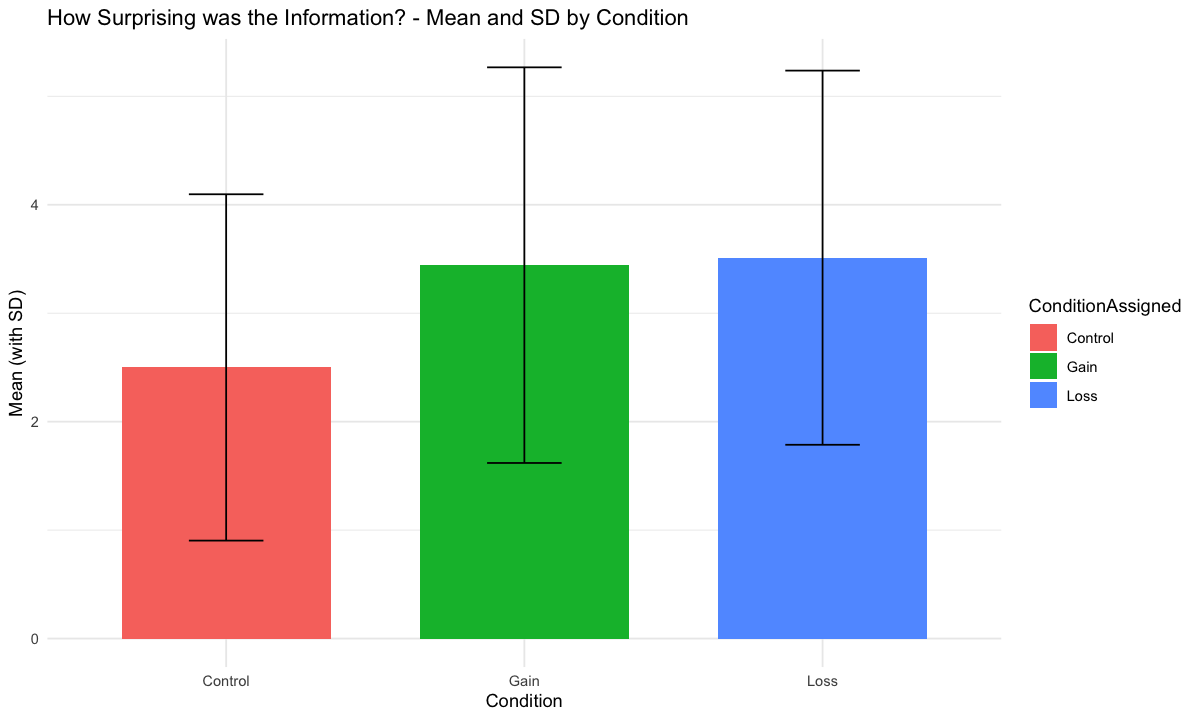

In [30]:
# Plot for Q2
Q2_graph = ggplot(descriptive_stats, aes(x = ConditionAssigned, y = Q2_mean, fill = ConditionAssigned)) +
  geom_bar(stat = "identity", position = position_dodge(), width = 0.7) +
  geom_errorbar(aes(ymin = Q2_mean - Q2_sd, ymax = Q2_mean + Q2_sd),
                width = 0.25, position = position_dodge(0.7)) +
  theme_minimal() +
  labs(title = "How Surprising was the Information? - Mean and SD by Condition", x = "Condition", y = "Mean (with SD)")
Q2_graph

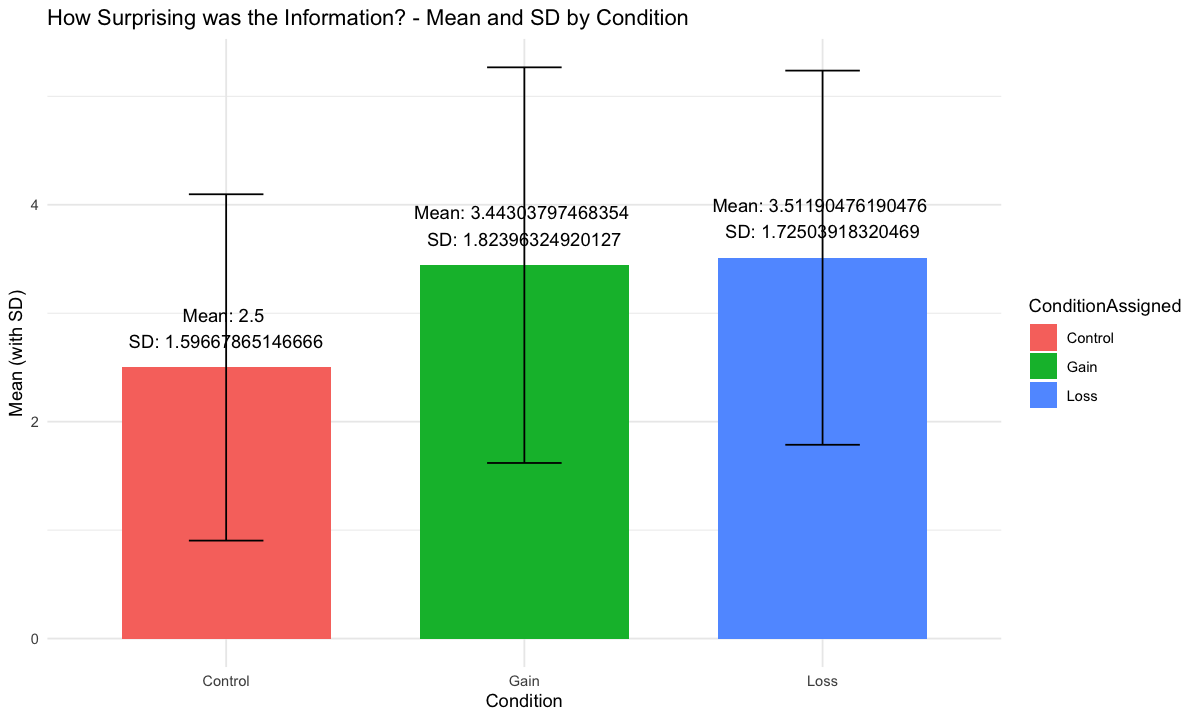

In [31]:
Q2_graph = ggplot(descriptive_stats, aes(x = ConditionAssigned, y = Q2_mean, fill = ConditionAssigned)) +
  geom_bar(stat = "identity", position = position_dodge(), width = 0.7) +
  geom_errorbar(aes(ymin = Q2_mean - Q2_sd, ymax = Q2_mean + Q2_sd),
                width = 0.25, position = position_dodge(0.7)) +
  geom_text(aes(label = paste("Mean:", Q2_mean, "\nSD:", Q2_sd)), position = position_dodge(width = 0.7), vjust = -0.5) +
  theme_minimal() +
  labs(title = "How Surprising was the Information? - Mean and SD by Condition", x = "Condition", y = "Mean (with SD)")
Q2_graph


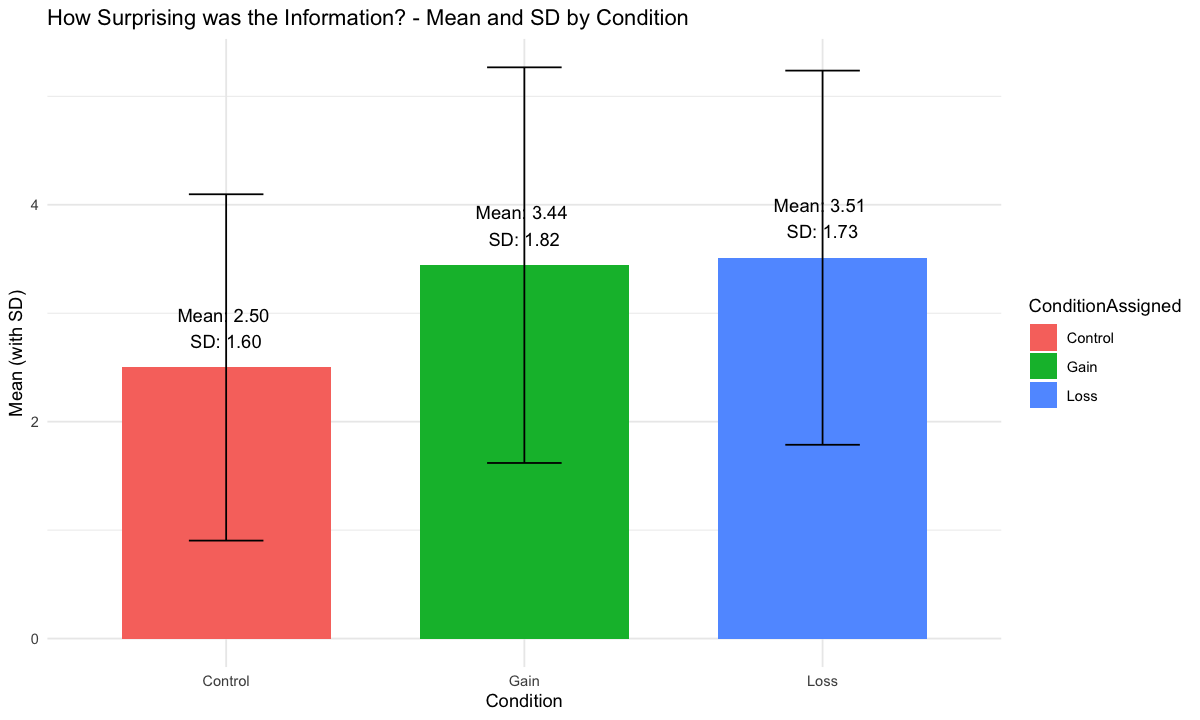

In [32]:
Q2_graph = ggplot(descriptive_stats, aes(x = ConditionAssigned, y = Q2_mean, fill = ConditionAssigned)) +
  geom_bar(stat = "identity", position = position_dodge(), width = 0.7) +
  geom_errorbar(aes(ymin = Q2_mean - Q2_sd, ymax = Q2_mean + Q2_sd),
                width = 0.25, position = position_dodge(0.7)) +
  geom_text(aes(label = paste("Mean:", sprintf("%.2f", Q2_mean), "\nSD:", sprintf("%.2f", Q2_sd))),
            position = position_dodge(width = 0.7), vjust = -0.5, hjust = 0.5) +
  theme_minimal() +
  labs(title = "How Surprising was the Information? - Mean and SD by Condition", x = "Condition", y = "Mean (with SD)")
Q2_graph


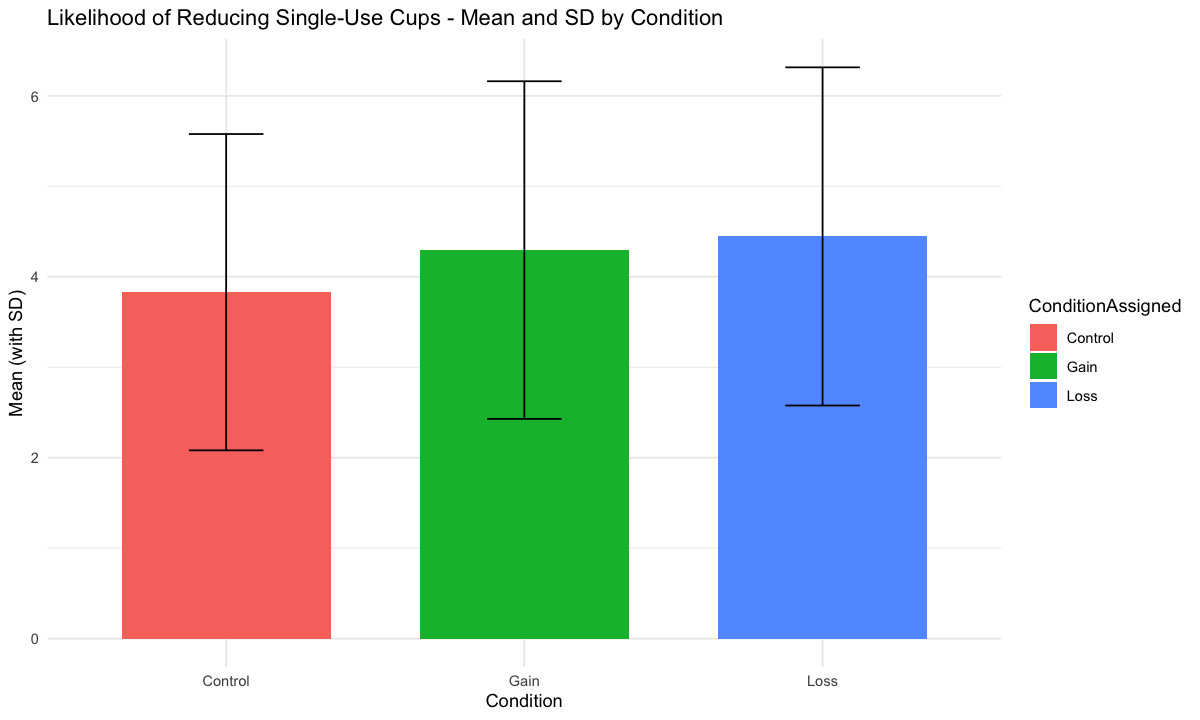

In [33]:
# Plot for Q2
Q3_graph = ggplot(descriptive_stats, aes(x = ConditionAssigned, y = Q3_mean, fill = ConditionAssigned)) +
  geom_bar(stat = "identity", position = position_dodge(), width = 0.7) +
  geom_errorbar(aes(ymin = Q3_mean - Q3_sd, ymax = Q3_mean + Q3_sd),
                width = 0.25, position = position_dodge(0.7)) +
  theme_minimal() +
  labs(title = "Likelihood of Reducing Single-Use Cups - Mean and SD by Condition", x = "Condition", y = "Mean (with SD)")
Q3_graph

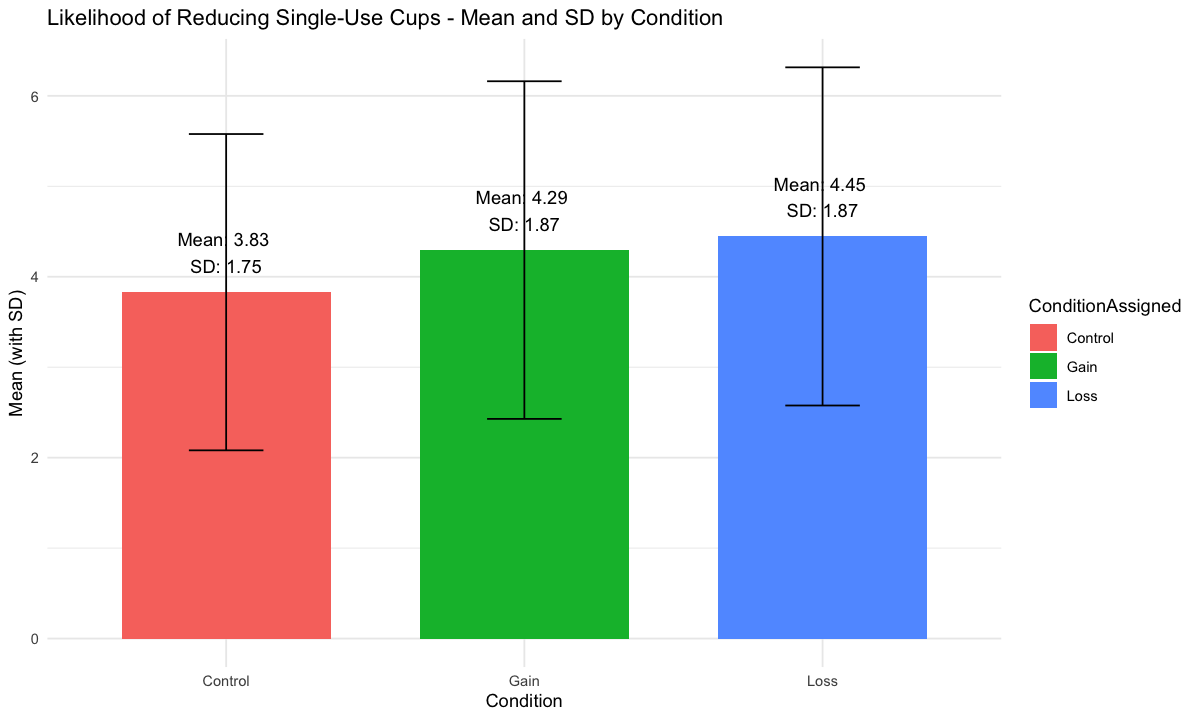

In [34]:
Q3_graph = ggplot(descriptive_stats, aes(x = ConditionAssigned, y = Q3_mean, fill = ConditionAssigned)) +
  geom_bar(stat = "identity", position = position_dodge(), width = 0.7) +
  geom_errorbar(aes(ymin = Q3_mean - Q3_sd, ymax = Q3_mean + Q3_sd),
                width = 0.25, position = position_dodge(0.7)) +
  geom_text(aes(label = paste("Mean:", sprintf("%.2f", Q3_mean), "\nSD:", sprintf("%.2f", Q3_sd))),
            position = position_dodge(width = 0.7), vjust = -0.5, hjust = 0.5) +
  theme_minimal() +
  labs(title = "Likelihood of Reducing Single-Use Cups - Mean and SD by Condition", x = "Condition", y = "Mean (with SD)")
Q3_graph


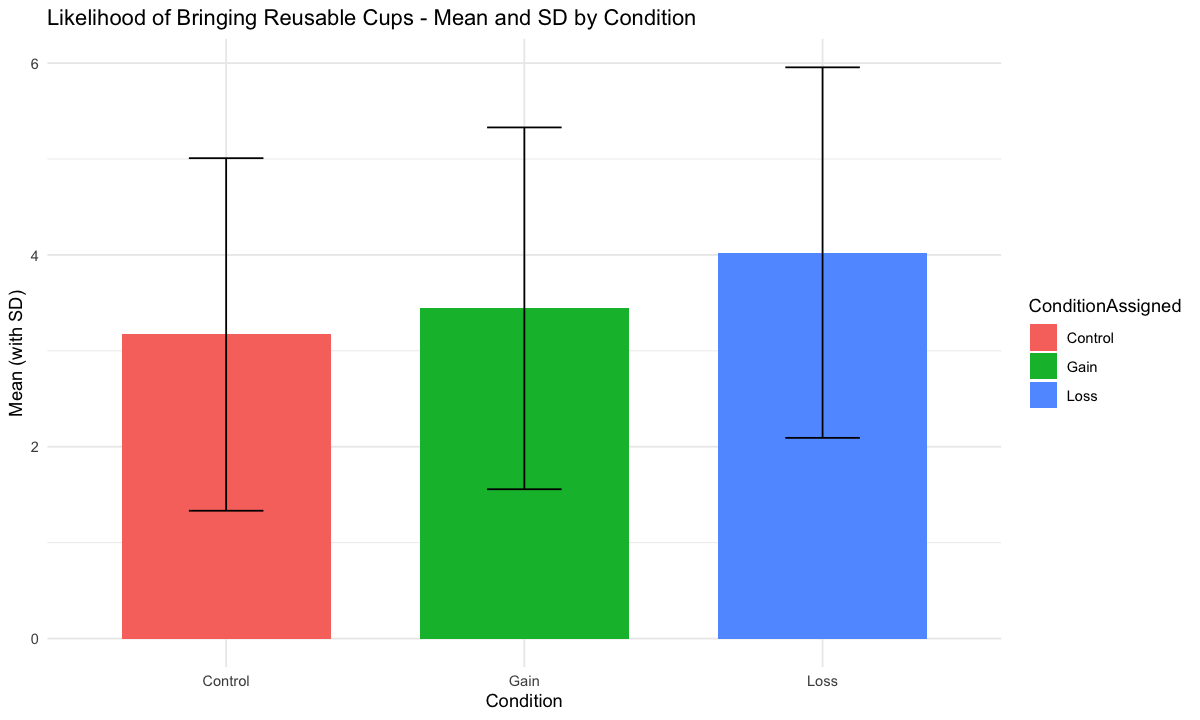

In [35]:
# Plot for Q2
Q4_graph = ggplot(descriptive_stats, aes(x = ConditionAssigned, y = Q4_mean, fill = ConditionAssigned)) +
  geom_bar(stat = "identity", position = position_dodge(), width = 0.7) +
  geom_errorbar(aes(ymin = Q4_mean - Q4_sd, ymax = Q4_mean + Q4_sd),
                width = 0.25, position = position_dodge(0.7)) +
  theme_minimal() +
  labs(title = "Likelihood of Bringing Reusable Cups - Mean and SD by Condition", x = "Condition", y = "Mean (with SD)")
Q4_graph

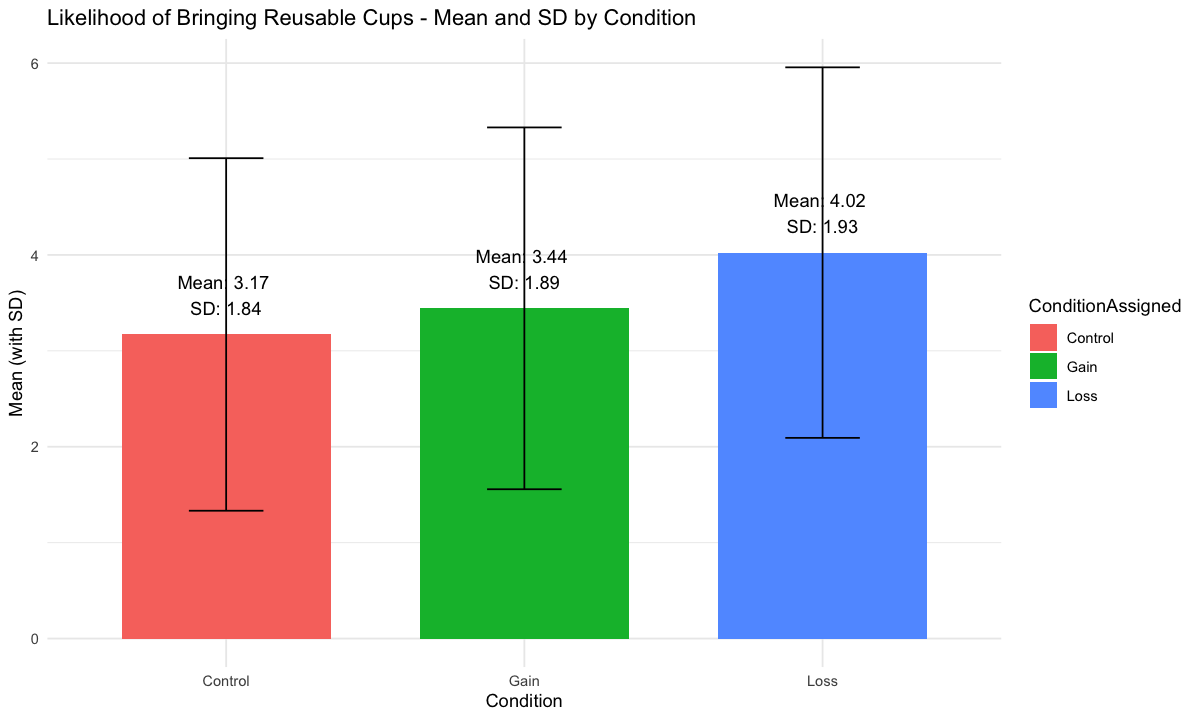

In [36]:
Q4_graph = ggplot(descriptive_stats, aes(x = ConditionAssigned, y = Q4_mean, fill = ConditionAssigned)) +
  geom_bar(stat = "identity", position = position_dodge(), width = 0.7) +
  geom_errorbar(aes(ymin = Q4_mean - Q4_sd, ymax = Q4_mean + Q4_sd),
                width = 0.25, position = position_dodge(0.7)) +
  geom_text(aes(label = paste("Mean:", sprintf("%.2f", Q4_mean), "\nSD:", sprintf("%.2f", Q4_sd))),
            position = position_dodge(width = 0.7), vjust = -0.5, hjust = 0.5) +
  theme_minimal() +
  labs(title = "Likelihood of Bringing Reusable Cups - Mean and SD by Condition", x = "Condition", y = "Mean (with SD)")
Q4_graph


## **One-Way ANOVA**

#### ANOVA Summaries Interpretation

We conducted an ANOVA (Analysis of Variance) to examine if there were statistically significant differences between the means of `Q2`, `Q3`, and `Q4` scores across the different `ConditionAssigned` groups. Below is a summary of the findings from each ANOVA test:

### For Q2 - How Surprising was the Information?:
ANOVA report: F(2, 242) = 8.898, p < .001, $eta^2$ = .068. This indicates a statistically significant difference in how surprising the information was perceived across the different conditions, with a small to medium effect size.

### For Q3 - Likelihood of Reducing Single-Use Cups:
ANOVA repor F(2, 240) = 2.536, p = .081, $eta^2$ = .021. This suggests that there was no statistically significant difference in the likelihood of reducing the use of single-use cups across conditions, with a very small effect size.

### For Q4 Likelihood of Bringing Reusable Cups - Mean and SD by Condition:
ANOVA report: F(2, 241) = 4.408, p = .013, $eta^2$ = .035. There was a statistically significant difference in the likelihood of bringing one's own reusable cup across conditions, with a small effect size.

### Interpretation:

For Q2, regarding how surprising participants found the information, the analysis revealed a statistically significant difference across conditions (F(2, 242) = 8.898, p < .001, \$eta^2$ = .068), indicating that the framing of information (Control, Gain, Loss) significantly affected participants' perceptions of surprise with a small to medium effect size.

For Q3, which assessed the likelihood of reducing the use of single-use cups, the difference across conditions was not statistically significant (F(2, 240) = 2.536, p = .081, $eta^2$ = .021), suggesting that condition framing did not significantly influence participants' intentions to reduce single-use cup usage, as indicated by the very small effect size.

Lastly, for Q4, concerning the likelihood of bringing one's own reusable cup, there was a statistically significant difference across conditions (F(2, 241) = 4.408, p = .013, $eta^2$ = .035), indicating a small effect size. This finding suggests that the way information is framed can significantly impact participants' intentions to bring reusable cups, though the effect is small.

These findings highlight the nuanced impact of message framing on environmental behavior intentions, with specific framing strategies potentially influencing certain behaviors more than others.

In [37]:
# For Q2_combined
aov_Q2 <- aov(Q2_combined ~ ConditionAssigned, data = df_cleaned_numerical)
summary(aov_Q2)

# For Q3_combined
aov_Q3 <- aov(Q3_combined ~ ConditionAssigned, data = df_cleaned_numerical)
summary(aov_Q3)

# For Q4_combined
aov_Q4 <- aov(Q4_combined ~ ConditionAssigned, data = df_cleaned_numerical)
summary(aov_Q4)


                   Df Sum Sq Mean Sq F value   Pr(>F)    
ConditionAssigned   2   52.4  26.215   8.898 0.000187 ***
Residuals         242  713.0   2.946                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
13 observations deleted due to missingness

                   Df Sum Sq Mean Sq F value Pr(>F)  
ConditionAssigned   2   17.0   8.479   2.536 0.0813 .
Residuals         240  802.3   3.343                 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
15 observations deleted due to missingness

                   Df Sum Sq Mean Sq F value Pr(>F)  
ConditionAssigned   2   31.4  15.677   4.408 0.0132 *
Residuals         241  857.1   3.556                 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
14 observations deleted due to missingness

In [38]:
# Calculating eta squared for each DV based on provided ANOVA summaries
eta_squared_Q2 <- 52.4 / (52.4 + 713.0)
eta_squared_Q3 <- 17.0 / (17.0 + 802.3)
eta_squared_Q4 <- 31.4 / (31.4 + 857.1)

print(eta_squared_Q2)
print(eta_squared_Q3)
print(eta_squared_Q4)

[1] 0.06846094
[1] 0.02074942
[1] 0.03534046


### ANOVA Assumptions:

1. Homogeneity of Variances: We use Levene's test to assess the homogeneity of variances assumption. This test doesn't assume that the data comes from a normal distribution.
### Interpretation of Levene's Test Results:

In all three cases, Levene's test does not provide evidence of variance inequality among the groups being compared. This suggests that the homogeneity of variances assumption required for ANOVA is met for our data. We can proceed with the ANOVA analysis, knowing that this particular assumption does not pose a problem for the validity of your results.

In [39]:
# Install and load the car package if you haven't already
if(!require(car)) install.packages("car")
library(car)

# Levene's Test for Q2_combined
leveneTest(Q2_combined ~ ConditionAssigned, data = df_cleaned_numerical)

# Levene's Test for Q3_combined
leveneTest(Q3_combined ~ ConditionAssigned, data = df_cleaned_numerical)

# Levene's Test for Q4_combined
leveneTest(Q4_combined ~ ConditionAssigned, data = df_cleaned_numerical)


Loading required package: car

Loading required package: carData


Attaching package: 'car'


The following object is masked from 'package:dplyr':

    recode


Warning message in leveneTest.default(y = y, group = group, ...):
"group coerced to factor."


,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,2,2.306908,0.1017545
,242,NA,NA


Warning message in leveneTest.default(y = y, group = group, ...):
"group coerced to factor."


,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,2,0.2165406,0.805457
,240,NA,NA


Warning message in leveneTest.default(y = y, group = group, ...):
"group coerced to factor."


,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,2,0.1455992,0.8645801
,241,NA,NA


2. Normality: We use the Shapiro-Wilk test to assess whether the residuals from the ANOVAs are normally distributed. This is important for each group in your ANOVA models.

### Interpretation of Shapiro-Wilk Test Results:

### Overall Interpretation:
The Shapiro-Wilk test results for all three questions (Q2, Q3, and Q4) suggest that the residuals from each ANOVA model do not follow a normal distribution, thereby violating the normality assumption of ANOVA. 

In [40]:
# Shapiro-Wilk Test on residuals for each ANOVA model

# For Q2_combined
shapiro.test(residuals(aov_Q2))

# For Q3_combined
shapiro.test(residuals(aov_Q3))

# For Q4_combined
shapiro.test(residuals(aov_Q4))



	Shapiro-Wilk normality test

data:  residuals(aov_Q2)
W = 0.92292, p-value = 5.673e-10



	Shapiro-Wilk normality test

data:  residuals(aov_Q3)
W = 0.95324, p-value = 4.577e-07



	Shapiro-Wilk normality test

data:  residuals(aov_Q4)
W = 0.9348, p-value = 6.332e-09


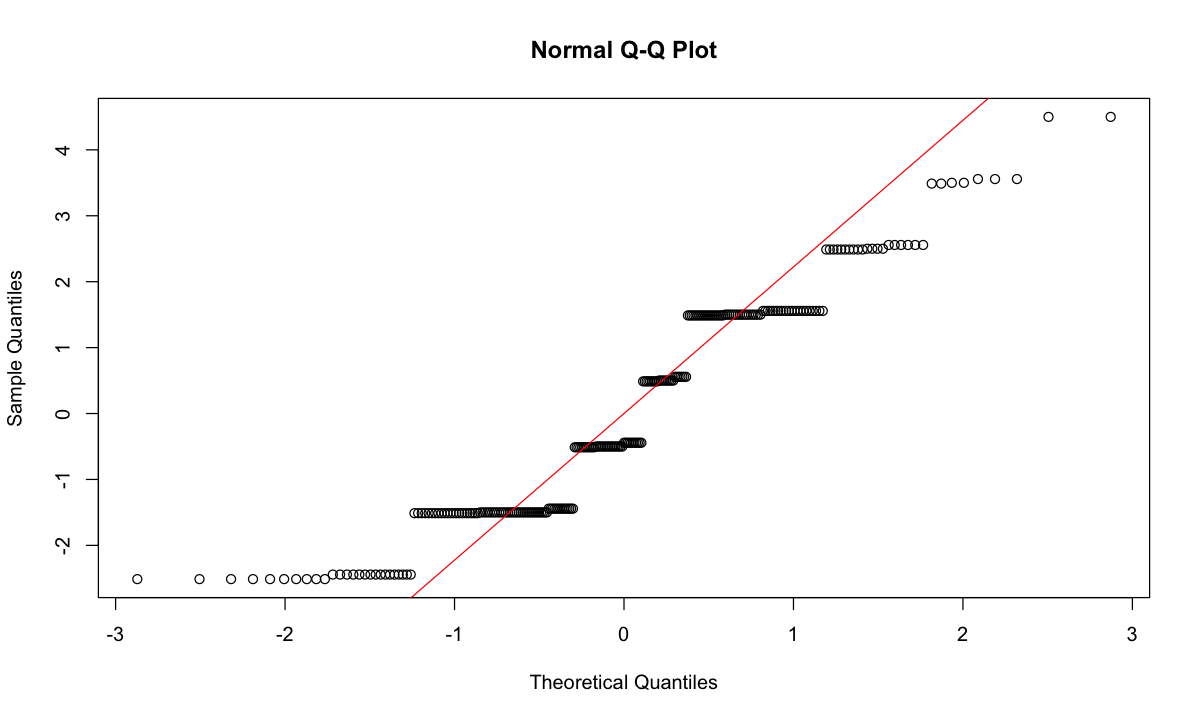

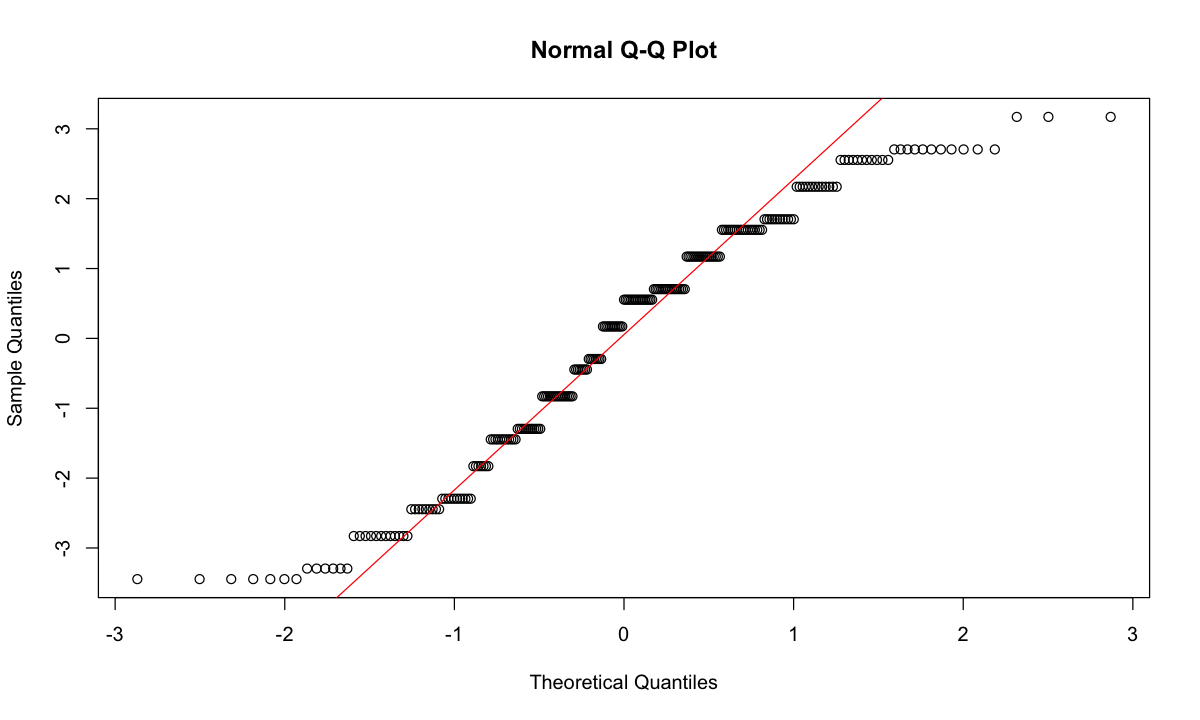

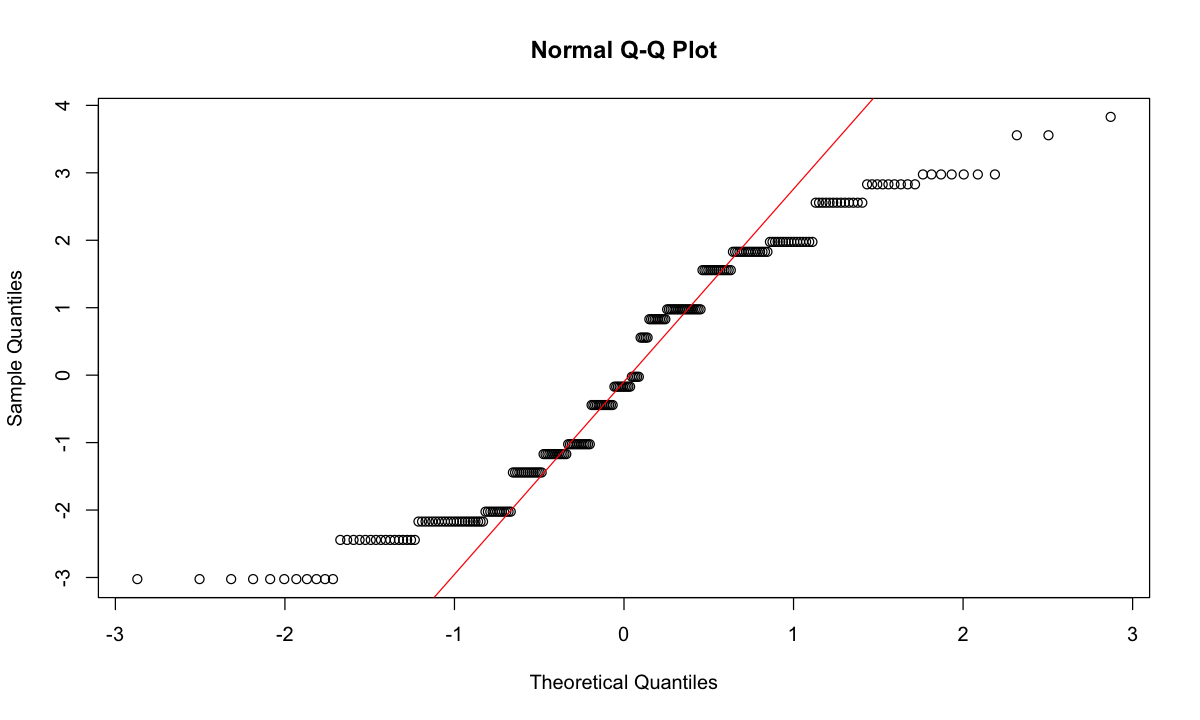

In [41]:
# Ensure the background is white for Q-Q plots
par(bg = "white")  # Sets the background parameter to white

# Q-Q plot for residuals of Q2_combined ANOVA model
qqnorm(residuals(aov_Q2), bg = "white")
qqline(residuals(aov_Q2), col = "red")  # Adds a reference line in red

# Repeat for Q3 and Q4
qqnorm(residuals(aov_Q3), bg = "white")
qqline(residuals(aov_Q3), col = "red")

qqnorm(residuals(aov_Q4), bg = "white")
qqline(residuals(aov_Q4), col = "red")


### **Since the data is not Normal, we will be conducting the Kruskal-Wallis test instead followed by Dunn’s Test (post-hoc) if statistically significant:**

## Question 2: How surprised?
- **Kruskal-Wallis chi-squared = 18.661**: This is the test statistic that results from the Kruskal-Wallis test. It's analogous to the F-statistic in ANOVA but is used in the context of this non-parametric test. The value of the test statistic is derived from differences among the ranks of the observations across the groups.
  
- **df = 2**: This indicates the degrees of freedom for the test, which, for the Kruskal-Wallis test, is equal to the number of groups minus one. In your case, this means there are three groups being compared (since 2+1=3).
  
- **p-value = 8.866e-05**: The p-value is a measure of the probability of observing the data (or something more extreme) if the null hypothesis were true. The null hypothesis for the Kruskal-Wallis test states that the medians of all groups are equal, or equivalently, that there are no differences in the distributions of `Q2_combined` scores across the different `ConditionAssigned` groups.

### Interpretation

Given the p-value is significantly less than the conventional significance level of 0.05 (in fact, it's much smaller, at approximately 0.00008866), we can reject the null hypothesis. This means there is statistically significant evidence to suggest that at least one of the groups differs in terms of its central tendency (median) of the `Q2_combined` scores from the others.

In [42]:
# Kruskal-Wallis test for Q2_combined across different conditions
kruskal.test(Q2_combined ~ ConditionAssigned, data = df_cleaned_numerical)



	Kruskal-Wallis rank sum test

data:  Q2_combined by ConditionAssigned
Kruskal-Wallis chi-squared = 18.661, df = 2, p-value = 8.866e-05


### Post-Hoc Dunn's test for Question 2 (How surprised)

The Kruskal-Wallis test followed by post-hoc pairwise comparisons (using a Bonferroni correction) provides a detailed look into how the groups differ. 

### Kruskal-Wallis Test Summary:
- **Kruskal-Wallis chi-squared = 18.6614**
- **Degrees of freedom (df) = 2**
- **p-value = 0**.

### Post-hoc Pairwise Comparisons: Dunn's test
The table shows the results of pairwise comparisons between your groups (`Control`, `Gain`, and `Loss`) with Bonferroni correction applied to adjust for multiple comparisons.

#### Interpretation of Pairwise Comparisons:

1. **Control vs. Gain**
   - **Statistic:** -3.497620
   - **p-value:** 0.0007
   - The negative statistic suggests that the `Gain` group has a lower rank (or median) compared to the `Control` group. Since the p-value is less than 0.05 (even considering Bonferroni correction, which would be 0.05/2 = 0.025 for two-tailed tests), this difference is statistically significant. Therefore, we reject the null hypothesis that the two groups have the same median.

2. **Control vs. Loss**
   - **Statistic:** -3.941016
   - **p-value:** 0.0001
   - Similar to the first comparison, the negative statistic indicates that the `Loss` group has a lower rank compared to the `Control` group. The p-value is significantly below 0.05, indicating a statistically significant difference. Thus, the null hypothesis of equal medians is rejected.

3. **Gain vs. Loss**
   - **Statistic:** -0.385454
   - **p-value:** 1.0000
   - The statistic here is closer to zero, suggesting a smaller difference in ranks between the `Gain` and `Loss` groups. The p-value, adjusted for multiple comparisons, indicates that this difference is not statistically significant. Therefore, we do not reject the null hypothesis for this pair, implying there is no significant difference in medians between the `Gain` and `Loss` groups.

### Overall Conclusion:
- The `Control` group significantly differs from both the `Gain` and `Loss` groups, indicating that the interventions (whether framed as gains or losses) have a significant impact compared to no intervention.
- There is no significant difference between the `Gain` and `Loss` groups, suggesting that the type of framing (gain vs. loss) does not significantly affect the outcomes measured by `x`.

In [43]:
if(!require(dunn.test)) install.packages("dunn.test")
library(dunn.test)

# Example for Q2_combined
dunn.test(df_cleaned_numerical$Q2_combined, df_cleaned_numerical$ConditionAssigned, method="bonferroni")


Loading required package: dunn.test



  Kruskal-Wallis rank sum test

data: x and group
Kruskal-Wallis chi-squared = 18.6614, df = 2, p-value = 0


                           Comparison of x by group                            
                                 (Bonferroni)                                  
Col Mean-|
Row Mean |    Control       Gain
---------+----------------------
    Gain |  -3.497620
         |    0.0007*
         |
    Loss |  -3.941016  -0.385454
         |    0.0001*     1.0000

alpha = 0.05
Reject Ho if p <= alpha/2


## Question 3: How likely are you to reduce single use cups?

Interpretation:
The p-value of 0.07237 is above the significance level of 0.05, meaning the test did not find statistically significant differences in the median Q3_combined scores across the different ConditionAssigned groups. In short, based on this analysis, we cannot conclude that the groups differ significantly regarding Q3.

In [44]:
# Kruskal-Wallis test for Q3_combined across different conditions
kruskal.test(Q3_combined ~ ConditionAssigned, data = df_cleaned_numerical)



	Kruskal-Wallis rank sum test

data:  Q3_combined by ConditionAssigned
Kruskal-Wallis chi-squared = 5.252, df = 2, p-value = 0.07237


## Question 4: How likely are you to bring your own cup?

The Kruskal-Wallis test results for `Q4_combined` by `ConditionAssigned` show:

- **Kruskal-Wallis chi-squared = 8.7613**: This statistic measures the differences among the groups.
- **Degrees of freedom (df) = 2**: Indicates comparisons among three groups.
- **p-value = 0.01252**: Assesses the significance of the observed differences.

### Interpretation:
The p-value of 0.01252 is less than the alpha level of 0.05, indicating that there are statistically significant differences in the median values of `Q4_combined` across the different `ConditionAssigned` groups. This result suggests that at least one group's median significantly differs from the others.

Now, Dunn's test will help us understand the pairwise differences between the groups, taking into account the multiple comparisons issue.

In [45]:
# Kruskal-Wallis test for Q4_combined across different conditions
kruskal.test(Q4_combined ~ ConditionAssigned, data = df_cleaned_numerical)



	Kruskal-Wallis rank sum test

data:  Q4_combined by ConditionAssigned
Kruskal-Wallis chi-squared = 8.7613, df = 2, p-value = 0.01252


### Kruskal-Wallis Test Summary:
- **Chi-squared = 8.7613**, **df = 2**, **p-value = 0.01**: Indicates significant differences across the groups at the 0.05 alpha level, suggesting at least one group's median significantly differs from the others.

### Pairwise Comparisons Post-Hoc: Dunn's Test

#### Control vs. Gain:
- **Statistic:** -0.993219
- **P-value:** 0.4809
- **Interpretation:** There is no statistically significant difference in the median likelihood of bringing their own cup between the Control and Gain groups after adjusting for multiple comparisons. The high p-value (greater than 0.05) suggests that any observed difference is not statistically significant.

#### Control vs. Loss:
- **Statistic:** -2.913315
- **P-value:** 0.0054
- **Interpretation:** There is a statistically significant difference between the Control and Loss groups, with the Loss group likely showing a greater likelihood of bringing their own cup compared to the Control group. The negative statistic value indicates that the Loss group ranks lower than the Control group, suggesting a higher propensity in the Loss condition to bring their own cup. The result is significant even after the Bonferroni correction.

#### Gain vs. Loss:
- **Statistic:** -1.889713
- **P-value:** 0.0882
- **Interpretation:** There is no statistically significant difference between the Gain and Loss groups after adjusting for multiple comparisons. The p-value is above 0.05, indicating that the difference in the median scores between these groups is not statistically significant.

### Overall Conclusion:
- The significant difference observed in the Kruskal-Wallis test is primarily between the Control and Loss groups. This suggests that the intervention or condition associated with the Loss group effectively influences participants' likelihood of bringing their own cup, compared to the Control group.
- No significant differences were found between Control vs. Gain and Gain vs. Loss groups, indicating that the Gain condition does not significantly alter the likelihood compared to both the Control and Loss conditions within the scope of this analysis.
  
### Notes on Interpretation:
- The significant result between Control and Loss highlights the potential impact of loss-framed messaging or interventions on promoting environmentally friendly behaviors such as bringing one's own cup.
- The lack of significant differences between the Gain and other groups suggests that gain-framed messages or interventions might not be as effective in this context, or the differences are not detectable by this test.
- Considering the adjustments for multiple comparisons ensures the robustness of these findings against the risk of Type I errors.

In [46]:
# Q_4 
dunn.test(df_cleaned_numerical$Q4_combined, df_cleaned_numerical$ConditionAssigned, method="bonferroni")


  Kruskal-Wallis rank sum test

data: x and group
Kruskal-Wallis chi-squared = 8.7613, df = 2, p-value = 0.01


                           Comparison of x by group                            
                                 (Bonferroni)                                  
Col Mean-|
Row Mean |    Control       Gain
---------+----------------------
    Gain |  -0.993219
         |     0.4809
         |
    Loss |  -2.913315  -1.889713
         |    0.0054*     0.0882

alpha = 0.05
Reject Ho if p <= alpha/2


## **Tukey's HSD Test**

### How surprising was the above information? 

The Tukey's Honestly Significant Difference (HSD) test results provide pairwise comparisons between the means of groups for your Q2 variable, which assessed how surprising the information was perceived across different conditions.

### Tukey HSD Results for Q2

Tukey's HSD test was conducted to explore the differences between conditions (Control, Gain, and Loss) regarding the perceived surprisingness of the information (Q2). The results were as follows:

- **Gain vs. Control**: The mean difference between the Gain and Control conditions was 0.943, 95% CI [0.305, 1.581], p = .002. This indicates a statistically significant higher level of surprise in the Gain condition compared to the Control condition, with a medium to large effect size.
- **Loss vs. Control**: The mean difference between the Loss and Control conditions was 1.012, 95% CI [0.384, 1.640], p < .001. This suggests a statistically significant higher level of surprise in the Loss condition compared to the Control condition, also indicating a medium to large effect size.
- **Loss vs. Gain**: The mean difference between the Loss and Gain conditions was 0.069, 95% CI [-0.566, 0.703], p = .965. This comparison did not reveal a statistically significant difference in the level of surprise between the Loss and Gain conditions, suggesting similar levels of perceived surprisingness.

### Interpretation

The Tukey HSD post-hoc analysis revealed significant differences in the perceived surprisingness of information between both the Gain and Loss conditions when compared to the Control condition. Specifically, participants found the information significantly more surprising in both the Gain and Loss conditions than in the Control condition, indicating that both gain-framed and loss-framed messages effectively elevated the perceived level of surprise compared to a neutral or control framing.

However, no significant difference was found between the Gain and Loss conditions themselves, suggesting that the increase in surprisingness is similar regardless of whether the information is framed as a gain or a loss. This finding underscores the importance of framing in communication strategies but also highlights that the direction of the framing (gain vs. loss) does not significantly alter the level of surprise experienced by the participants for this particular measure.

In [47]:
# Tukey HSD test for Q2_combined
tukey_Q2 <- TukeyHSD(aov(Q2_combined ~ ConditionAssigned, data = df_cleaned_numerical))
print(tukey_Q2)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = Q2_combined ~ ConditionAssigned, data = df_cleaned_numerical)

$ConditionAssigned
                   diff        lwr       upr     p adj
Gain-Control 0.94303797  0.3049076 1.5811684 0.0016867
Loss-Control 1.01190476  0.3835218 1.6402878 0.0005405
Loss-Gain    0.06886679 -0.5655250 0.7032586 0.9645235



### How likely are you to reduce using single use cups? -- Not conducted as statistically significant differences not found in one-way ANOVA

### How likely are you to bring your own reusable cup when purchasing beverages?

### Tukey HSD Results for Q4

The Tukey HSD test examined pairwise differences between conditions concerning participants' likelihood of bringing their own reusable cups. The findings are detailed below:

- **Gain vs. Control**: The mean difference was 0.272, 95% CI [-0.429, 0.973], p = .631. This difference was not statistically significant, indicating that the likelihood of bringing one's own reusable cup was similar in the Gain and Control conditions.
- **Loss vs. Control**: The mean difference was 0.853, 95% CI [0.161, 1.546], p = .011. This result indicates a statistically significant higher likelihood of bringing one's own reusable cup in the Loss condition compared to the Control condition, suggesting a medium to large effect size.
- **Loss vs. Gain**: The mean difference was 0.581, 95% CI [-0.118, 1.280], p = .124. This difference was not statistically significant, indicating that there was no clear difference in the likelihood of bringing one's own reusable cup between the Loss and Gain conditions, though the direction of the effect suggests a higher likelihood in the Loss condition.

### Interpretation

The Tukey HSD post-hoc analysis for Q4 revealed a significant difference between the Loss and Control conditions, indicating that participants were significantly more likely to express an intention to bring their own reusable cups when exposed to loss-framed messages compared to neutral/control messaging. This finding underscores the effectiveness of loss framing in promoting pro-environmental behavior, at least within the context of reducing single-use cup consumption by bringing reusable cups.

Conversely, no significant difference was observed between the Gain and Control conditions, nor between the Gain and Loss conditions, suggesting that gain-framed messages do not significantly increase the likelihood of bringing one's own reusable cup compared to control messages or even loss-framed messages. This lack of significant difference between Gain and Loss conditions might suggest that while loss framing can be effective, the degree of its effectiveness over gain framing in encouraging the specific behavior of bringing reusable cups is not as pronounced or varies depending on the audience or context.

These insights can inform environmental communication strategies, particularly in encouraging sustainable practices such as the use of reusable cups. The results highlight the potential of carefully framed messages to influence individual behaviors towards more sustainable choices, with loss framing showing particular promise in this regard.

In [48]:
# Tukey HSD test for Q4_combined
tukey_Q4 <- TukeyHSD(aov(Q4_combined ~ ConditionAssigned, data = df_cleaned_numerical))
print(tukey_Q4)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = Q4_combined ~ ConditionAssigned, data = df_cleaned_numerical)

$ConditionAssigned
                  diff        lwr       upr     p adj
Gain-Control 0.2723063 -0.4288018 0.9734143 0.6307519
Loss-Control 0.8533647  0.1609146 1.5458148 0.0111126
Loss-Gain    0.5810584 -0.1179741 1.2800909 0.1244003




### **Hypothesis**: Framing the single-use cup fee as a loss will be more effective in reducing the usage of single-use cups compared to framing it as a gain.

### Analysis and Support for Hypothesis:

- **For Q2** (Surprisingness of Information): While there was a statistically significant difference across conditions in how surprising the information was perceived, this measure does not directly address the hypothesis concerning the effectiveness of loss vs. gain framing in reducing single-use cup usage.

- **For Q3** (Likelihood of Reducing Single-Use Cups): The ANOVA results showed no statistically significant difference across conditions (p = .081), suggesting that neither loss nor gain framing significantly influenced participants' intentions to reduce single-use cup usage compared to the control. Thus, based on Q3 alone, the hypothesis does not find support.

- **For Q4** (Likelihood of Bringing Reusable Cups): The ANOVA found a statistically significant difference across conditions (p = .013), with a small effect size. The Tukey HSD test further identified that the likelihood of bringing one's own reusable cup was significantly higher in the Loss condition compared to the Control condition, which aligns with the hypothesis that loss framing is more effective than no framing (control).

### Summary of Support:
The hypothesis posited that loss framing would be more effective than gain framing in promoting behaviors that reduce single-use cup usage. While the direct measure of reducing single-use cup usage (Q3) did not show a statistically significant effect of framing, the related behavior of bringing one's own reusable cup (Q4) did show a significant effect for loss framing when compared to the control. This suggests partial support for the hypothesis: loss framing appears to influence some behaviors related to reducing single-use cup usage more effectively than no framing, but the specific effect of loss framing compared to gain framing on the direct intention to reduce cup usage was not conclusively supported by Q3 results.

However, the significant effect observed in the likelihood of bringing one's own reusable cup (Q4) under loss framing—compared to control and the nonsignificant difference between gain and loss—suggests that loss framing may indeed be more effective in promoting pro-environmental behavior in certain contexts. This nuanced outcome indicates that while the hypothesis finds some support, the effectiveness of loss framing over gain framing specifically in reducing single-use cup usage directly (as measured by Q3) was not statistically substantiated. Further research could explore under what conditions and for which specific behaviors loss framing might be most effective.

---